In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [1]:
file_train_text = "../../data/training_text/training_text"
file_train_variant = "../../data/training_variants/training_variants"

In [3]:
train_text = pd.read_csv(file_train_text, sep = '\|\|')
train_text.index.name = "ID"
train_text.columns = ["Text"]

train_variant = pd.read_csv(file_train_variant)
train_variant.set_index("ID",inplace = True)

/home/ragou/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [4]:
train_variant[train_variant["Variation"].isin(["C396R", "H398Q", "Y371H", "K382E", "C381A"])]

,Gene,Variation,Class
ID,,,
8,CBL,Y371H,4
11,CBL,K382E,4
13,CBL,C381A,4
21,CBL,C396R,4


In [5]:
train_variant[train_variant["Variation"] == "Q249E"]

,Gene,Variation,Class
ID,,,
2,CBL,Q249E,2


In [6]:
train_text.loc[[6],]

,Text
ID,
6,Oncogenic mutations in the monomeric Casitas B...


In [7]:
gene_count = train_variant["Gene"].value_counts().loc[lambda x : x > 100].to_dict()

In [8]:
gene_class = train_variant[train_variant["Gene"].isin(gene_count.keys())]

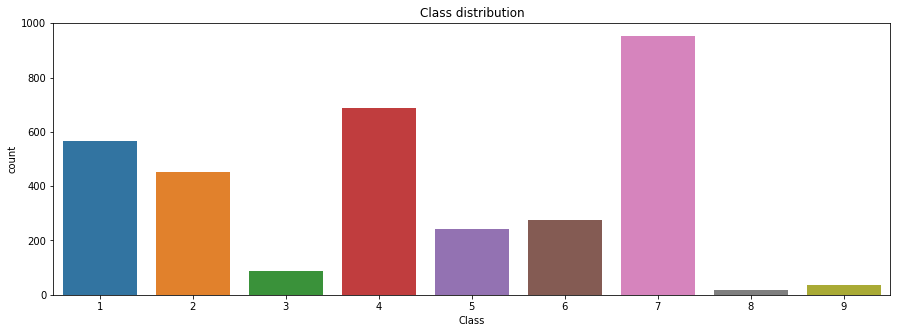

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x = train_variant["Class"])
plt.title("Class distribution")
plt.show()

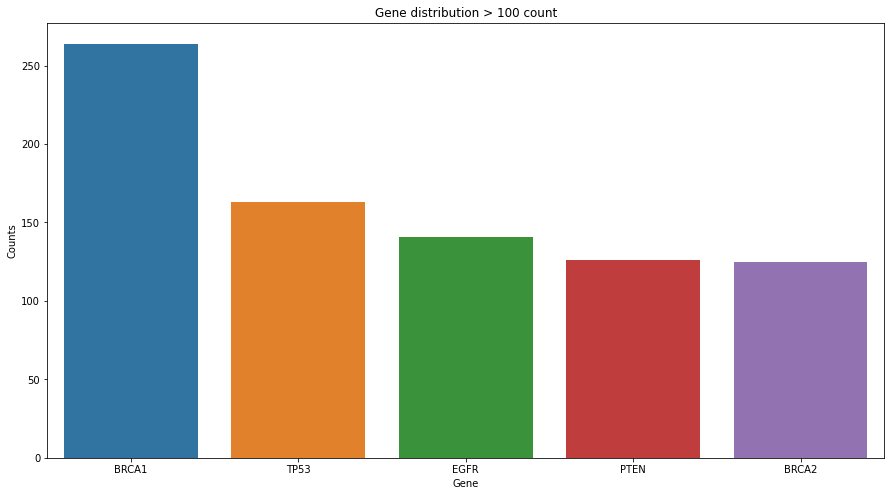

In [10]:
plt.figure(figsize=(15,8))

sns.barplot( x = list(gene_count.keys()), y = list(gene_count.values()))
plt.title("Gene distribution > 100 count")
plt.ylabel("Counts")
plt.xlabel("Gene")

plt.show()

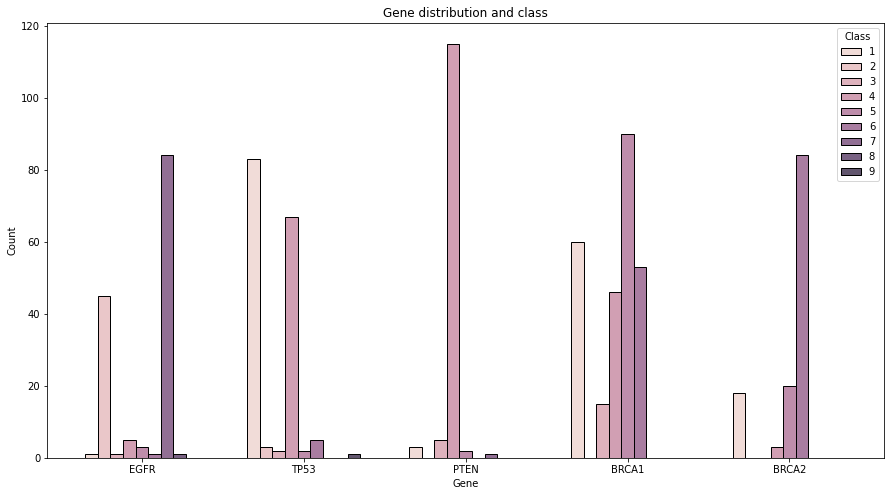

In [11]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_variant[train_variant["Gene"].isin(gene_count.keys())],
             x="Gene", hue="Class", multiple="dodge", shrink=.7)
plt.title("Gene distribution and class")
plt.show()

In [12]:
train_variant.head(5)

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4


In [200]:
train_variant[train_variant["Gene"] == "RAD51"]

,Gene,Variation,Class
ID,,,


In [13]:
train_text.head(5)

,Text
ID,
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...


In [41]:
amino_acid_dict = {'C' : 'CYS', 'D' : 'ASP', 'S' : 'SER', 'Q' : 'GLN', 'K' : 'LYS',
    'I' : 'ILE', 'P' : 'PRO', 'T' : 'THR', 'F' : 'PHE', 'N' : 'ASN', 
    'G' : 'GLY', 'H' : 'HIS', 'L' : 'LEU', 'R' : 'ARG', 'W' : 'TRP', 
    'A' : 'ALA', 'V' : 'VAL', 'E' : 'GLU', 'Y' : 'TYR', 'M' : 'MET'}

# Fonction pour la selection

## clean_text
Nettoie l'article, lower puis enlève les points qui pourrait nuire à la detection des phrases, (comme les "...", ou "fig.A")


## find_match
Va détecter la phrase qui contient le mot, puis prend 1 phrase avant et après (au total 3 phrase) (voir diapo)

In [169]:
def amino_three(amino):
    return amino_acid_dict[amino]
    
def decompose_variation(variation):
    decompose_aa_pos_aa = re.compile("([a-z]{1,})(\d+)([a-z]{1,})")
    list_variation = decompose_aa_pos_aa.search(variation)
    if list_variation:
        aa1 = list_variation.group(1)
        aa2 = list_variation.group(3)

        if len(aa1) + len(aa2) == 2:
            amino1 = amino_acid_dict[aa1.upper()].lower()
            position = list_variation.group(2)
            amino2 = amino_acid_dict[aa2.upper()].lower()
            return [amino1,position,amino2]
    return []

['tyr', '371', 'ser']

In [142]:
concatenate_data["Variation"].apply(lambda x: print(x,decompose_variation(x.lower())))

Truncating Mutations None
W802* None
Q249E ['gln', '249', 'glu']
N454D ['asn', '454', 'asp']
L399V ['leu', '399', 'val']
V391I ['val', '391', 'ile']
V430M ['val', '430', 'met']
Deletion None
Y371H ['tyr', '371', 'his']
C384R ['cys', '384', 'arg']
P395A ['pro', '395', 'ala']
K382E ['lys', '382', 'glu']
R420Q ['arg', '420', 'gln']
C381A ['cys', '381', 'ala']
P428L ['pro', '428', 'leu']
D390Y ['asp', '390', 'tyr']
Truncating Mutations None
Q367P ['gln', '367', 'pro']
M374V ['met', '374', 'val']
Y371S ['tyr', '371', 'ser']
H94Y ['his', '94', 'tyr']
C396R ['cys', '396', 'arg']
G375P ['gly', '375', 'pro']
S376F ['ser', '376', 'phe']
P417A ['pro', '417', 'ala']
H398Y ['his', '398', 'tyr']
S2G ['ser', '2', 'gly']
Y846C ['tyr', '846', 'cys']
C228T ['cys', '228', 'thr']
H412Y ['his', '412', 'tyr']
H876Q ['his', '876', 'gln']
Promoter Mutations None
P704S ['pro', '704', 'ser']
Amplification None
C250T ['cys', '250', 'thr']
G1809R ['gly', '1809', 'arg']
G1809K ['gly', '1809', 'lys']
D1709E ['asp',

L410R ['leu', '410', 'arg']
V299G ['val', '299', 'gly']
H1620R ['his', '1620', 'arg']
Truncating Mutations None
L1584R ['leu', '1584', 'arg']
Q1554H ['gln', '1554', 'his']
T1623I ['thr', '1623', 'ile']
H597Y ['his', '597', 'tyr']
E1552del None
T1203K ['thr', '1203', 'lys']
V1673F ['val', '1673', 'phe']
V705M ['val', '705', 'met']
P1675L ['pro', '1675', 'leu']
G1596V ['gly', '1596', 'val']
R905W ['arg', '905', 'trp']
R905Q ['arg', '905', 'gln']
V1673D ['val', '1673', 'asp']
R611W ['arg', '611', 'trp']
L830R ['leu', '830', 'arg']
S1653P ['ser', '1653', 'pro']
R905G ['arg', '905', 'gly']
S1653F ['ser', '1653', 'phe']
V769E ['val', '769', 'glu']
Q1503P ['gln', '1503', 'pro']
Deletion None
A889P ['ala', '889', 'pro']
W1610G ['trp', '1610', 'gly']
R462C ['arg', '462', 'cys']
R1200W ['arg', '1200', 'trp']
L792R ['leu', '792', 'arg']
L493V ['leu', '493', 'val']
L493P ['leu', '493', 'pro']
C696Y ['cys', '696', 'tyr']
L826P ['leu', '826', 'pro']
A614D ['ala', '614', 'asp']
L146R ['leu', '146', '

S222D ['ser', '222', 'asp']
D67N ['asp', '67', 'asn']
S226D ['ser', '226', 'asp']
F57V ['phe', '57', 'val']
F57L ['phe', '57', 'leu']
K101M ['lys', '101', 'met']
L46F ['leu', '46', 'phe']
N126D ['asn', '126', 'asp']
C125S ['cys', '125', 'ser']
F57C ['phe', '57', 'cys']
S222D ['ser', '222', 'asp']
E207K ['glu', '207', 'lys']
V35M ['val', '35', 'met']
Truncating Mutations None
T244_I245insCPT None
M269R ['met', '269', 'arg']
R552S ['arg', '552', 'ser']
R552G ['arg', '552', 'gly']
G434R ['gly', '434', 'arg']
E846K ['glu', '846', 'lys']
N233Y ['asn', '233', 'tyr']
T73I ['thr', '73', 'ile']
PVT1-MYC Fusion None
IGL-MYC Fusion None
MYC-nick None
Fusions None
IGH-MYC Fusion None
IGK-MYC Fusion None
Amplification None
Amplification None
P44L ['pro', '44', 'leu']
F12L ['phe', '12', 'leu']
Truncating Mutations None
K398A ['lys', '398', 'ala']
L142P ['leu', '142', 'pro']
H65Y ['his', '65', 'tyr']
A19V ['ala', '19', 'val']
P70R ['pro', '70', 'arg']
D1384V ['asp', '1384', 'val']
Deletion None
R1262

E839K ['glu', '839', 'lys']
K642E ['lys', '642', 'glu']
K550_K558del None
P577_D579del None
N822H ['asn', '822', 'his']
Y578C ['tyr', '578', 'cys']
Y553_K558del None
C809G ['cys', '809', 'gly']
P551_E554del None
T417_D419delinsRG None
T417_D419delinsI None
H697Y ['his', '697', 'tyr']
N655K ['asn', '655', 'lys']
D816Y ['asp', '816', 'tyr']
F522C ['phe', '522', 'cys']
C443Y ['cys', '443', 'tyr']
K558delinsNP None
W557R ['trp', '557', 'arg']
V559C ['val', '559', 'cys']
Y553_Q556del None
M541L ['met', '541', 'leu']
P577_W582delinsPYD None
D820G ['asp', '820', 'gly']
E554_K558del None
P551_V555del None
S501_A502dup None
D419del None
Amplification None
T574_R588delinsL None
V559_V560del None
M552_K558del None
K509I ['lys', '509', 'ile']
W557G ['trp', '557', 'gly']
L576P ['leu', '576', 'pro']
A504_Y505ins None
V559del None
V559D ['val', '559', 'asp']
D816V ['asp', '816', 'val']
Q556_K558del None
P551_W557delinsL None
Exon 11 mutations None
V560G ['val', '560', 'gly']
D814V ['asp', '814', 'val

ID
0       None
1       None
2       None
3       None
4       None
        ... 
3316    None
3317    None
3318    None
3319    None
3320    None
Name: Variation, Length: 3316, dtype: object

In [239]:
def clean_text(article):
    dot3 = re.compile("[.]{2,}")
    fig = re.compile("fig[s]?\.")
    decimal = re.compile("\d+\.\d+")    
    etal = re.compile("et al\.")
    ie = re.compile("i.e.")
    inc = re.compile("inc.")
    mutation_point = re.compile("[p|c]\.")
    
    clean_article = article.lower()
    clean_article = dot3.sub(".", clean_article)
    clean_article = fig.sub("", clean_article)
    clean_article = decimal.sub("", clean_article)
    clean_article = etal.sub("", clean_article)
    clean_article = ie.sub("", clean_article)    
    clean_article = inc.sub("", clean_article)    
    clean_article = mutation_point.sub("", clean_article)    
    
    
    return clean_article

def join_tuple_string(strings_tuple):
    return ' '.join(strings_tuple)

def find_match(text, word):
    clean = clean_text(text)
    word = word.lower()
    target_sentence = "([^.]*{}[^.]*\.)".format(word)
    before_after_target = "([^.]*\.){0,1}"    
    match_exp = re.compile(before_after_target + target_sentence + before_after_target)
    match_text = match_exp.findall(clean)
    final_match = "".join(list(map(join_tuple_string, match_text)))
    return final_match

def extract_match(line):
    # Cleaning text 
    text = clean_text(line["Text"])
    variation = line["Variation"].lower()
    gene = line["Gene"].lower()
    
    # Try first match with inital variation value
    initial_match = find_match(text, variation)    
    if len(initial_match) != 0:
        return initial_match    

    aa_pos_aa = decompose_variation(variation)
    if aa_pos_aa :
        if len(aa_pos_aa) == 3:
            # If we success to split variation in 3 group --> aa1 pos aa2
            # Second try without the last amino acid --> y371
            match_variation_aa_pos = find_match(text, variation[:-1])
            if len(match_variation_aa_pos) != 0:
                return match_variation_aa_pos

            # Third try with 3 letter code of amino acid --> tyr371ser
            match_aa_pos_aa = find_match(text, "".join(aa_pos_aa))
            if len(match_aa_pos_aa) != 0:
                return match_aa_pos_aa
            
            # Try with 3 letter code without the last aa --> tyr371
            match_aa_pos = find_match(text, aa_pos_aa[0] + aa_pos_aa[1])

            return match_aa_pos
    return []



In [170]:
a = [0,1,2,3]
a[:-1]

[0, 1, 2]

In [148]:
extract_match(concatenate_data.loc[19,:])

" transformed nih3t3 cells showed pi3 kinase-dependent activation of akt and the transformed phenotype was reverted by treatment with the pi3 kinase inhibitor ly294002 (supplementary  9).  when introduced into lin-\u2009sca1+\u2009c-kit+ (lsk) hspcs, c-cbl mutants (c-cbl(gln367pro) and c-cbl(tyr371ser)), as well as a mouse lymphoma-der oncogenic mutant (c-cbl(70z)), significantly promoted the replating capacity of these progenitors ( 2a).  because c-cbl negaty modulates tyroskinase signalling, and all c-cbl mutations, uding those previously reported13, 14, 15, 16, affected the critical domains for its enzymatic activity involved in this modulation, c-cbl was postulated to have a tumour suppressor function; loss-of-function could be a mechanism for the oncogenicity of these c-cbl mutants3, 5. if you requassistance to access this image, or to obtain a text description, please contact npg@nature. com a, prolonged replating capacity of lsk cells transduced with mutant c-cbl (c-cbl(gln367pr

# Exemple à la main juste pour tester

In [15]:
word_to_search = "FAM58A"

In [16]:
article = train_text.loc[0].values[0]

In [17]:
article.count(word_to_search)

34

In [32]:
clean_match = find_match(article, word_to_search)

In [33]:
print("Before selection : total lenght {} and {} occurences of the word {}".format(
    len(article),article.count(word_to_search) , word_to_search))

print("After selection :  total lenght {} and {} occurences of the word {}".format(
    len(clean_match),clean_match.count(word_to_search.lower()), word_to_search))

Before selection : total lenght 39672 and 34 occurences of the word FAM58A
After selection :  total lenght 9214 and 34 occurences of the word FAM58A


In [185]:
concatenate_data = pd.merge(train_variant, train_text, on="ID").dropna()
concatenate_data

,Gene,Variation,Class,Text
ID,,,,
0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...,...,...
3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...
3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...
3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...


In [215]:
concatenate_data_gene = concatenate_data[concatenate_data["Gene"] == "CBL"]

# Explications du problème
Fonction poubelle juste pour voir ceux qui sont pas détectable --> len(match) == 0

Si ils sont pas détectable, c'est que le nom donné pour leurs variation sont pas dans l'article, donc je vérfie à la main sur le site https://regex101.com/r/lvQZIf/1 qui sert à visualiser les expressions régulières.
En copiant collant tout l'article, je regarde comment je peux détecter la variation avec un autre nom ducoup, comme le nom de base ne marche pas.

Par exemple Id = 19, y371s n'est pas dans l'article mais il y est sous la forme tyr371ser.

Cet regexpr ne marche pas (le texte est en minuscule) -> `([^.]*\.){0,1}([^.]*y371s[^.]*\.)([^.]*\.){0,2}`

Mais celle la marchera -> `([^.]*\.){0,1}([^.]*tyr371ser[^.]*\.)([^.]*\.){0,2}` (ça donne 3 match sur le site pour l'article id = 19)

(pour les regex, il faut juste changer le nom au milieu après `*` et avant `[^.]`)

Autre exemple, ID = 102, mutation r922* qui n'est mentionné sous aucunes formes, ni même la position 922. Mais, il y a des mots qui peuvent faire penser à cette mutation du genre "nonsense mutations" car l'étoile (\*) veut dire que r922 est devenu un codon stop, donc c'est une mutation non sens. Faudrait voir si je peux convertir ces mutations en mot pour faciliter la détection, ou utiliser un champ lexical.


Donc là, j'essaie de faire plus ou moins au cas par cas (pas tous, y en a 880...) pour déterminer des groupes de variations indétectable pour revoir la détection.
Par exemple, pour les variations de type `y371s`, je peux prendre `y371`, ou tout simplement `371` qui peuvent détecter la variation dans certain cas.


Par contre, pour ceux où y a vraiment pas d'infos dans l'article avec la variation, du genre `t1365m` ID = 44; je sais pas quoi faire d'eux :)
Car la position 1365 n'est même pas mentionné dans l'article, donc je vois pas comment détecter les infos liées à cette mutation...

Soit je garde l'article entier, soit je prend le nom du gène pour la détection, mais le pb avec ça, c'est que ducoup tout ceux qui sont indétectables de ce gène là, auront les mêmes lignes de détecté car je détecterai uniquement en utilisant le nom du gène, donc y aura pas de différences entre eux même si la variation diffère.




## Ne lance pas la cellule juste en bas, ça prend un certain temps et de toute façon, tu as déjà la sortie avec tout ceux qui ne marchent pas.

La sortie est de la forme : 
`variation | id | len(article_original) | len(match)`

Certaines variations sont des mots complets du genre `truncating mutations`, un peu relou pour la détection, ce qu'on pourrait faire, c'est utiliser des mots qui ressemble à truncating grace à des méthodes de traitements de texte qui va prendre que le préfix par exemple et automatiser ça pour les mots

In [210]:
def check_line(x):
    match = len(extract_match(x))
    if match == 0:
        print(x["Variation"].lower(), x.name, len(x["Text"]), match)

        
concatenate_data.apply(lambda x : check_line(x) , axis = 1)

truncating mutations 0 39672 0
truncating mutations 16 54507 0
t1365m 44 13014 0
t844m 46 9081 0
r1343l 49 13014 0
r1209w 61 13014 0
q984k 63 42783 0
n1125i 66 42783 0
amplification 71 44437 0
l234fs 72 76910 0
l1273f 73 27028 0
amplification 75 44437 0
i290a 80 43021 0
truncating mutations 88 15618 0
tgfbr1*6a 96 140451 0
truncating mutations 100 203122 0
r922* 102 84989 0
e1322* 104 104807 0
g39e 106 40090 0
r1076c 108 52438 0
truncating mutations 110 179443 0
v509a 111 40090 0
e946* 112 95425 0
f1088lfs*5 113 124926 0
f1088sfs*2 114 117868 0
truncating mutations 117 95005 0
n1333gfs* 120 14270 0
r957q 136 33576 0
l747_t751delinsp 138 95317 0
s752_i759del 139 222215 0
i491m 140 2924 0
d770_p772dup 141 205155 0
n771_h773dup 144 201980 0
k467t 145 2924 0
e746_t751insip 146 47739 0
d770_n771insd 147 182847 0
k745_a750del 149 86157 0
v765a 151 27225 0
e758g 155 23798 0
k806a 161 23798 0
egfr-rad51 fusion 164 27882 0
e746q 168 37286 0
exon 19 deletion/insertion 169 312332 0
a859_l883delin

v84l 1593 48256 0
l158q 1613 337 0
l188v 1615 48256 0
r154w 1630 53189 0
r228k 1631 53189 0
truncating mutations 1633 38739 0
g85r 1636 53189 0
flt3 internal tandem duplications 1640 37017 0
y599_d600insglyvdfreyey 1643 138165 0
i836del 1653 38691 0
y599_d600insstdneyfyvdfreyey 1654 97461 0
e598_y599insdvdfreye 1655 97461 0
w603_e604insdreyeydlkw 1656 97461 0
s840_n841insgs 1658 109970 0
a627t 1659 19065 0
l601_k602insreyeydl 1674 138165 0
f594_r595inssdneyfyvdf 1675 97461 0
l611_e612inscssdneyfyvdfreyeydlkwefprenl 1676 138165 0
e612_f613insgyvdfreyeydlkwefrprenlef 1677 138165 0
y599_d600inspapqimststlisenmnia 1679 97461 0
e598_y599insglvqvtgssdneyfyvdfreye 1682 138165 0
y599_d600inseyeyeyey 1684 97461 0
d600_l601insfreyeyd 1687 97461 0
r20q 1692 25946 0
truncating mutations 1694 168341 0
r421* 1696 40090 0
i18v 1698 46874 0
l585i 1700 46874 0
r315* 1704 40090 0
422_605trunc 1707 69851 0
s459del 1708 29690 0
s279y 1712 42767 0
l424i 1716 29690 0
truncating mutations 1722 61851 0
e580* 

chtop-ntrk1 fusion 3226 59202 0
tfg-ntrk1 fusion 3228 74710 0
mprip-ntrk1 fusion 3230 8252 0
cpeb1-ntrk3 fusion 3237 29413 0
g253c 3242 69156 0
truncating mutations 3252 92332 0
casp8l 3254 127548 0
c248t 3255 25213 0
promoter hypermethylation 3256 80501 0
ret-ccdc6 fusion 3257 27906 0
c634r 3261 12216 0
e632_l633del 3263 15921 0
c611y 3265 12216 0
r833c 3285 32809 0
c630r 3288 12216 0
c634y 3292 12216 0
y113* 3298 40127 0
p173s 3303 40127 0
s70fsx93 3305 40127 0
truncating mutations 3307 99027 0
tel-runx1 fusion 3312 33646 0
a122* 3317 40127 0


ID
0       None
1       None
2       None
3       None
4       None
        ... 
3316    None
3317    None
3318    None
3319    None
3320    None
Length: 3316, dtype: object

# Variable ID pour faciliter le print des deux cellules suivantes pour choper le text, la variation et le gene d'un ID et les copier coller sur le site regex

Pour la détection, je teste juste avec le nom de la variation, puis vraiment si y a rien, je regarde du coté du nom du gène

In [235]:
ID = 12
concatenate_data_gene

,Gene,Variation,Class,Text
ID,,,,
1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
5,CBL,V391I,4,Oncogenic mutations in the monomeric Casitas B...
6,CBL,V430M,5,Oncogenic mutations in the monomeric Casitas B...
7,CBL,Deletion,1,CBL is a negative regulator of activated recep...
8,CBL,Y371H,4,Abstract Juvenile myelomonocytic leukemia (JM...
9,CBL,C384R,4,Abstract Juvenile myelomonocytic leukemia (JM...


In [234]:
concatenate_data_gene[concatenate_data_gene["Variation"] == "R420Q"]

,Gene,Variation,Class,Text
ID,,,,
12,CBL,R420Q,4,Noonan syndrome is an autosomal dominant conge...


In [244]:
clean_article_CBL = pd.DataFrame(concatenate_data_gene.apply(lambda x : extract_match(x), axis = 1), columns = ["Text"])

In [247]:
clean_article_CBL.drop(16).to_csv("clean_article_CBL.csv")

In [229]:
for x in clean_article_CBL.values:
    print(len(x[0]))

5746
5746
2529
787
787
890
16218
19579
18329
787
12973
40720
8808
413
11778
0
372
1351
1851
7435
1045
787
1137
1934
1137


In [238]:
concatenate_data.loc[ID,"Text"].lower()

173604

In [237]:
print(concatenate_data.loc[ID,"Variation"].lower(),
concatenate_data.loc[ID,"Gene"].lower())

r420q cbl


In [207]:
train_text.loc[train_variant[train_variant["Gene"] == "CBL"].loc[:25,:].index,]

,Text
ID,


In [217]:
CBL = train_variant[train_variant["Gene"] == "CBL"]
CBL

,Gene,Variation,Class
ID,,,
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4
5,CBL,V391I,4
6,CBL,V430M,5
7,CBL,Deletion,1
8,CBL,Y371H,4
9,CBL,C384R,4


In [222]:
article_cbl = train_text.loc[CBL.index,]
article_cbl

,Text
ID,
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...
5,Oncogenic mutations in the monomeric Casitas B...
6,Oncogenic mutations in the monomeric Casitas B...
7,CBL is a negative regulator of activated recep...
8,Abstract Juvenile myelomonocytic leukemia (JM...
9,Abstract Juvenile myelomonocytic leukemia (JM...


In [219]:
CBL.to_csv("cbl.txt")

In [249]:
article_cbl.to_csv("cbl_article.txt", sep="|")
import numpy as np

In [252]:
CBL = train_variant[train_variant["Gene"] == "RUNX1"]
article_cbl = train_text.loc[CBL.index,]

CBL.to_csv("cbl.txt")
dtf = pd.merge(pd.DataFrame(clean_article_CBL.index), clean_article_CBL, on ="ID")
np.savetxt("cbl_clean_article.txt",dtf, fmt = "%d||%s", header= ",".join(dtf.columns), comments='')

In [259]:

",".join(dtf.columns)

'ID,Text'